# Part III: Working with *Real Data*

We have learned a lot about programming in python - the syntax and the functionality - but, for the most part, we have been using fairly simple examples and data sets. So, let's now take a look at how we might use python to work with some real data.

Download the following [file](https://github.com/kls2177/ccia_files/blob/master/argo_float_4901412.npz?raw=true) and save it in the same directory that you are working in. The data we will be working with is ocean temperature, salinity, and pressure from an [Argo float](https://argo.ucsd.edu/).

Argo floats are amazing! They are autonomous floats that drift and dive throughout the ocean (see [Figure](argo)) relaying information about temperature and salinity to satellites. 

```{figure} argo.png
---
scale: 25%
name: argo
---
Map of the position of operational Argo floats as of July 2020.
```

## 1. Load the Data

The first thing we need to do is import NumPy and Matplotlib. See if you can remember the syntax for importing these packages.

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt

Now, let's load the file. The `.npz` file format is a NumPy file format, so we can easily load this file using the `np.load()` function. Note that the raw Argo data does not come in such a nice file format - I made this part a bit easy for us :)

In [2]:
# Load data
argo = np.load('argo_float_4901412.npz')

## 2. Preliminary Data Exploration

We can examine the data using some simple commands. Note that `.npz` files store NDarrays in a dictionary format. We can identify the different dictionary categories, using the below command.

In [3]:
# Display data categories
print(argo.files)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


So, we have seven categories. **S** is for salinity, **T** is for temperature and **P** is for pressure.

We can access the array in each category just as we did for dictionaries.

In [4]:
print(argo['T'])

[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]


This looks like a lot of data. Let's take a look at the shape of the `T` array.

In [5]:
print(argo['T'].shape)

(78, 75)


Ok, it looks like we have a 2-D array. What do those two dimensions correspond to? See if you can try to figure out what these dimensions correspond to by printing out the shape of other variables. Click below to check your answer.

In [6]:
# Shape of array in 'levels' category
print(argo['levels'].shape)

# So, it looks like one of the dimensions corresponds to the number of pressure levels (i.e., the depth of the float).
# Let's take a closer look. What does `levels` look like?

print(argo['levels'])

(78,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


In [7]:
# We see that we simply have a set of consecutively numbered levels.
# What about the other dimension? 

# Shape of array in 'date'
print(argo['date'].shape)

# The other dimension corresponds to `date`!

# data in 'date'
print(argo['date'])

(75,)
['2012-07-13T22:33:06.019200000' '2012-07-23T22:54:59.990400000'
 '2012-08-02T22:55:52.003200000' '2012-08-12T23:08:59.971200000'
 '2012-08-22T23:29:01.968000000' '2012-09-01T23:17:38.976000000'
 '2012-09-12T02:59:18.960000000' '2012-09-21T23:18:37.036800000'
 '2012-10-02T03:00:17.971200000' '2012-10-11T23:13:27.984000000'
 '2012-10-22T02:50:32.006400000' '2012-10-31T23:36:39.974400000'
 '2012-11-11T02:40:46.041600000' '2012-11-20T23:08:29.990400000'
 '2012-12-01T02:47:51.993600000' '2012-12-10T23:23:16.972800000'
 '2012-12-21T02:58:48.979200000' '2012-12-30T23:07:23.030400000'
 '2013-01-10T02:56:43.008000000' '2013-01-19T23:24:26.956800000'
 '2013-01-30T02:43:53.011200000' '2013-02-08T23:15:27.043200000'
 '2013-02-19T01:12:50.976000000' '2013-02-28T23:07:13.008000000'
 '2013-03-11T02:43:30.979200000' '2013-03-20T23:17:22.992000000'
 '2013-03-31T01:50:38.025600000' '2013-04-09T23:19:07.968000000'
 '2013-04-20T02:53:29.990400000' '2013-04-29T23:28:33.024000000'
 '2013-05-10T02:50:

In [8]:
# Looking at the dates, we see that data is collected every 20 days.

# Finally, what are the dimensions of the remaining variables?

# shape of remaining variables
print(argo['S'].shape)
print(argo['P'].shape)
print(argo['lat'].shape)
print(argo['lon'].shape)

(78, 75)
(78, 75)
(75,)
(75,)


Ok, so now we have a sense of how our data is organized. Often we know this before we even load the data, but sometimes we don't.

Let's perform a few other NumPy operations on data to get a sense of what our data looks like. For example, let's find the maximum temperature value in our data set.

In [9]:
# find the maximum
print(np.max(argo['T']))

# alternative way to find the maximum
print(argo['T'].max())

nan
nan


Oops! Why are we getting `nan` (not-a-number) as the output? This usually means that there are invalid entries within column `T`.

If we examine the `T` column, you should see some entries are nan.

In [10]:
print(argo['T'])

[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]


We cannot proceed until this issue is resolved because many NumPy functions do not work properly if arrays contain `nan` values. We have a few options:

* Delete `nan` entries? You can’t delete the invalid entry, that will mess up the shape.
* Manually assign place-holder values? This can be tedious.

NumPy offers a convenient approach to dealing with `nan` values: We can use something called [**Masked Arrays**](https://numpy.org/doc/stable/reference/maskedarray.generic.html).

### 2.1 Masked Arrays

Here we will "mask" out the invalid or `nan` values.

In [11]:
# mask nan values
T = np.ma.masked_invalid(argo['T'])
print(T)

[[18.974000930786133 18.437000274658203 19.099000930786133 ...
  19.113000869750977 21.822999954223633 20.131000518798828]
 [18.740999221801758 18.399999618530273 19.082000732421875 ...
  18.472000122070312 19.459999084472656 20.125]
 [18.3700008392334 18.374000549316406 19.065000534057617 ...
  18.229999542236328 19.261999130249023 20.07699966430664]
 ...
 [3.7929999828338623 3.813999891281128 3.802000045776367 ...
  3.806999921798706 3.811000108718872 3.859999895095825]
 [3.7639999389648438 3.7780001163482666 3.756999969482422 ...
  3.753999948501587 3.746000051498413 3.805999994277954]
 [3.74399995803833 3.746000051498413 3.7249999046325684 ... --
  3.7139999866485596 --]]


Above command will create a new masked array called T with all invalid entries masked (--).

The mask is simply an array with same shape as the originial data, with 0 and 1 as values. If value is 1, then corresponding data will be ignored.

Let's look at masked arrays in a bit more detail using a simple example.

In [12]:
# create a 1-D array with a nan value
mx = np.array([1,2,3,np.float('nan'),5])
print(mx)

[ 1.  2.  3. nan  5.]


If we try to compute the mean, for example, what will we get?

In [13]:
# calculate the mean of mx
print(mx.mean())

nan


We get a meaningless answer.

Instead, let's create a mask that will tell NumPy to ignore the element with the `nan` value.

In [14]:
# create a masked array
mx = np.ma.masked_array(np.array([1,2,3,4,5]), mask=[0, 0, 0, 1, 0])
print(mx)

[1 2 3 -- 5]


Now, what happens when we try to compute the mean?

In [15]:
print(mx.mean())

2.75


Masked arrays are very powerful and can help to save a lot of time when dealing with missing data.

Ok, now back to our Argo data. We can now mask out all the `nan` values!

In [16]:
# mask nan values
T = np.ma.masked_invalid(argo['T'])
S = np.ma.masked_invalid(argo['S'])
P = np.ma.masked_invalid(argo['P'])
lat = np.ma.masked_invalid(argo['lat'])

## 3. Plotting the Data

First, let's plot some simple time series of our data. Time series are line plots with time on the x-axis and the variable of interest on the y-axis. 

To plot time series of this data, we have to pick a level that we are going to plot. Let's pick the surface (level 0) and a level at-depth (level 60) and plot time series of `T` and `S`.

Before you click to reveal, try this on your own. Once you have something, first click to reveal the output and see if your plot looks similar to mine. If you're stuck, click to reveal the code.

Text(0, 0.5, 'psu')

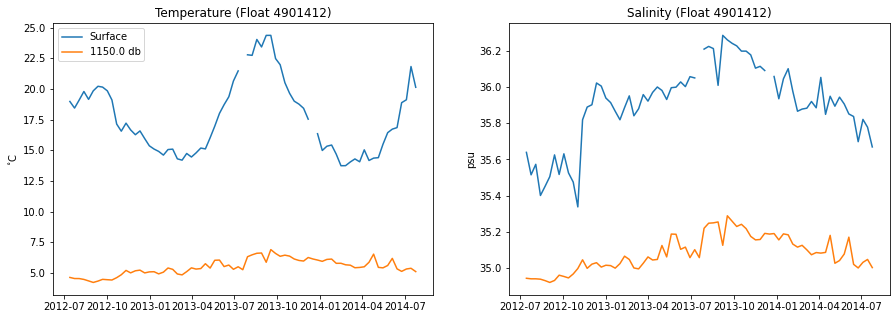

In [17]:
# define figure size
plt.figure(figsize=(15,5))

# subplot 1
plt.subplot(1,2,1)
plt.plot(argo['date'],T[0,:],label = 'Surface')
plt.plot(argo['date'],T[60,:],label = str(np.round(np.mean(P[60,:]))) + ' db')
plt.title('Temperature (Float 4901412)')
plt.ylabel('$^{\circ}$C') # note: special syntax is required to make symbols
plt.legend(loc = 'upper left')

# subplot 2
plt.subplot(1,2,2)
plt.plot(argo['date'],S[0,:])
plt.plot(argo['date'],S[60,:])
plt.title('Salinity (Float 4901412)')
plt.ylabel('psu')

Do you see the seasonal cycle in the surface temperature data? Cool!

Now, let's do a scatter plot. A *T-S* plot is a common way to plot ocean properties. Try it on your own: google "matplotlib scatter plot" to find the command.

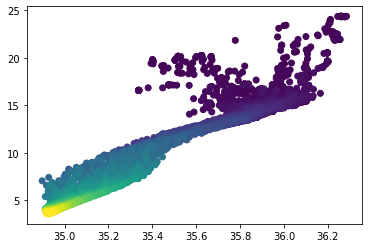

In [18]:
# create a scatter plot
plt.scatter(S, T, c=P) # color corresponds to P, pressure

### 3.1 More Plotting Options
Let's play around with matplotlib! It is more powerful than you think. 

Try to style your scatter plot above:

* add labels to your x- and y-axes.
* add a title
* add a colourbar
* add units to your colourbar
* change the size of your figure
* make your font larger

If you get stuck, click to reveal.

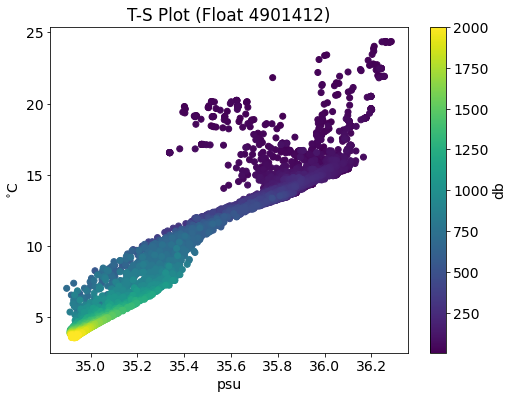

In [19]:
# Plot with title, labels and color bar

# change font size
plt.rcParams.update({'font.size': 14})

# define figure size
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(S, T, c=P)

# title, labels, colourbar
plt.title("T-S Plot (Float 4901412)")
plt.xlabel("psu")
plt.ylabel("$^{\circ}$C")
plt.colorbar(label = "db") # Add color bar
plt.show()

## 4. Simple Statistical Analysis

Finally, let's do a bit of statistical analysis of our data. NumPy has several [statistical functions](https://numpy.org/doc/stable/reference/routines.statistics.html) that we can use.

Let's see whether there is a clear relationship between latitude and surface salinity, i.e. does the surface salinity change as the float travels northward? 

To investigate this, let's first do a scatter plot of these two variabiles. Try on your own first.

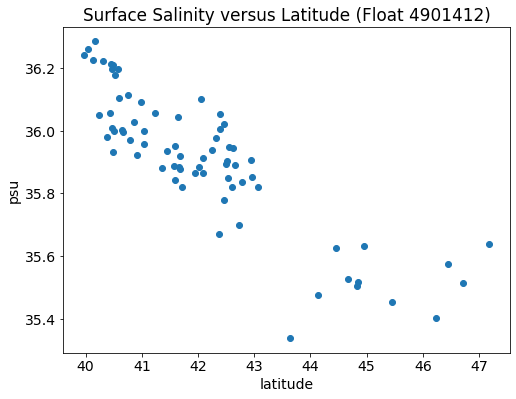

In [20]:
# Plot with title, labels and color bar

# change font size
plt.rcParams.update({'font.size': 14})

# define figure size
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(argo['lat'], S[0,:])

# title, labels, colourbar
plt.title("Surface Salinity versus Latitude (Float 4901412)")
plt.xlabel("latitude")
plt.ylabel("psu")
plt.show()

Looks like there is a fairly linear relationship between latitude and surface salinity with salinity decreasing the further north the float travels.

Let's fit a line to this relationship using `np.polyfit()` and `np.polyval()`. 

* `np.polyfit(x,y,n)` takes in the predictor (`x`), predictand (`y`) and fits a polynomial of degree-`n`. A straight line is a polynomial of degree-1. The output of this function are the coefficients of the fit (`a`).
* `np.polyval(a,x)` takes in the coefficients of the fit (`a`) and the predictor (`x`) and outputs the new fitted `y` values.

In [21]:
# Fit a line (note: we will use np.ma.polyfit because S is a masked array)

a = np.ma.polyfit(argo['lat'],S[0,:],1) # finds the slope and y-intercept for the best-fit line

# Find the new values of the line
S_fit = np.polyval(a,argo['lat'])

We usually also want to know how robust our linear fit is. To do this we want the *R*-squared value. This tells us what fraction of the variance in `S` if explained by `lat`.

Using NumPy, we can do this using the `np.corrcoef()` function, which computes the correlation matrix (**R**).

In [22]:
# calculate the correlation between lat and S
r = np.ma.corrcoef(argo['lat'],S[0,:])
print(r)

[[1.0 -0.8585086946368407]
 [-0.8585086946368407 1.0]]


We want the off-diagonal values. Thus, *R*-squared will just be the squared value of *R*.

In [23]:
# compute the R**2
Rsq = r[0,1]**2
print(Rsq)

0.7370371787670521


Wow! Latitude explains about 74% for the variance in surface salinity. 

Now, let's add the linear fit and the *R*-squared information to our plot (as text). Try it on your own first.

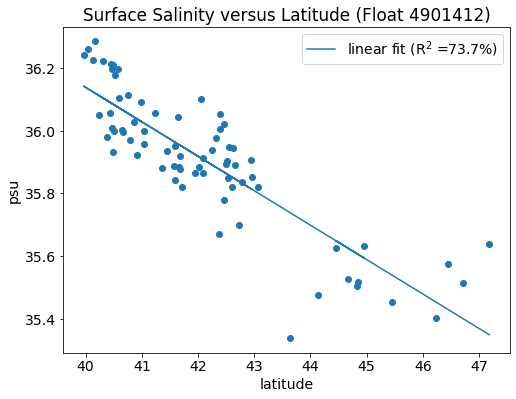

In [24]:
# Plot with title, labels and color bar

# change font size
plt.rcParams.update({'font.size': 14})

# define figure size
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(argo['lat'], S[0,:])

# add linear fit
plt.plot(argo['lat'], S_fit, label='linear fit (R$^2$ =' + str(np.round(Rsq*100,2)) +'%)')

# title, labels, colourbar
plt.title("Surface Salinity versus Latitude (Float 4901412)")
plt.xlabel("latitude")
plt.ylabel("psu")
plt.legend(loc="upper right")
plt.show()

This is just a quick sampling of what you can do with NumPy. More sophisticated statistical and numerical analysis can be done with other Python packages, such as [SciPy](https://www.scipy.org/) and [statsmodels](https://www.statsmodels.org/stable/index.html).

Now, it's your turn to try some simple plotting and analysis.